In [10]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4747 - accuracy: 0.8308
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3573 - accuracy: 0.8692
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3218 - accuracy: 0.8820
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2955 - accuracy: 0.8902
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2788 - accuracy: 0.8978
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2628 - accuracy: 0.9029
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2508 - accuracy: 0.9062
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2385 - accuracy: 0.9100
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2308 - accuracy: 0.9133
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0

In [2]:
import tensorflow as tf
print(tf.__version__)

!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

2.7.0
--2021-12-20 08:22:42--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  13.6MB/s    in 6.1s    

2021-12-20 08:22:50 (11.0 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [5]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 8s - loss: 0.8060 - accuracy: 0.5200 - val_loss: 0.6933 - val_accuracy: 0.5000 - 8s/epoch - 304ms/step
Epoch 2/20
25/25 - 6s - loss: 0.6946 - accuracy: 0.5400 - val_loss: 0.6804 - val_accuracy: 0.8500 - 6s/epoch - 253ms/step
Epoch 3/20
25/25 - 6s - loss: 0.6778 - accuracy: 0.5800 - val_loss: 0.6436 - val_accuracy: 0.6500 - 6s/epoch - 254ms/step
Epoch 4/20
25/25 - 6s - loss: 0.6902 - accuracy: 0.5200 - val_loss: 0.6541 - val_accuracy: 0.6000 - 6s/epoch - 253ms/step
Epoch 5/20
25/25 - 6s - loss: 0.6999 - accuracy: 0.5300 - val_loss: 0.6627 - val_accuracy: 0.5000 - 6s/epoch - 252ms/step
Epoch 6/20
25/25 - 7s - loss: 0.6509 - accuracy: 0.6100 - val_loss: 0.5604 - val_accuracy: 0.8000 - 7s/epoch - 269ms/step
Epoch 7/20
25/25 - 6s - loss: 0.5894 - accuracy: 0.6900 - val_loss: 0.6394 - val_accuracy: 0.6500 - 6s/epoch - 253ms/step
Epoch 8/20
25/25 - 6s - loss: 0.6086 - accuracy: 0.7000 - val_loss: 0.5291 - val_accuracy: 0.7500 - 6s/epoch - 254ms/step
Epoch 9/20
25/25 - 6s - 

Saving e83dcfda80cf389a9f8e181519b0f7bf.jpg to e83dcfda80cf389a9f8e181519b0f7bf.jpg
e83dcfda80cf389a9f8e181519b0f7bf.jpg
clean


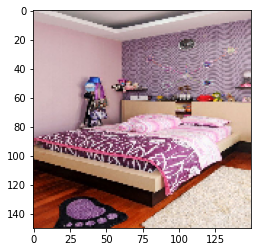

In [14]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('messy')
  else:
   print('clean')